In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score

In [3]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,1.157015,-1.234902,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,-0.939975,-1.195367,-1.082035,0.287438,0.342528,-0.217543,0
1,-0.864293,-0.418205,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,0.300692,-0.514986,-0.158456,0.719635,1.589522,-0.261279,0
2,1.157015,-0.184863,1.014780,0.963467,-0.173865,-0.077142,-0.670629,-0.162713,0.187904,-0.220155,-0.242418,-0.112835,-0.073137,-0.523697,0
3,-0.864293,1.331861,1.014780,1.827943,-0.173865,-0.077142,1.491138,-0.162713,-0.263248,0.800415,1.017008,0.682800,-0.904467,0.919604,1
4,-0.864293,-0.418205,1.014780,1.222810,-0.173865,-0.077142,-0.670629,-0.162713,1.090208,-0.106758,0.093429,-0.662904,0.758192,0.132348,0
5,-0.864293,-0.768218,-0.985435,-0.765484,-0.173865,-0.077142,1.491138,-0.162713,-0.195575,2.161176,2.276434,1.105174,0.093129,0.744658,0
6,-0.864293,1.565203,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,-0.714399,0.256111,-0.998074,1.795216,-1.320132,0.132348,1
7,-0.864293,-0.534876,1.014780,0.963467,-0.173865,-0.077142,-0.670629,-0.162713,1.721820,-1.467519,-0.998074,-1.011608,0.259395,-0.173806,0
8,1.157015,0.281822,-0.985435,-0.765484,-0.173865,-0.077142,1.491138,-0.162713,0.526268,0.414867,0.513237,0.137643,0.009996,-0.130070,0
9,1.157015,-0.768218,1.014780,1.827943,-0.173865,-0.077142,1.491138,-0.162713,-0.263248,1.344720,2.024549,-0.537665,1.423256,0.263558,0


<br>

### Labeling the Dataset and doing Train, Test and Split

In [4]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

### Selecting the Estimator

In [6]:
logReg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)
logReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)

In [7]:
y_pred = logReg.predict(X_test)

In [8]:
logReg.score(X_train, y_train)

0.6730769230769231

In [9]:
logReg.score(X_test, y_test)

0.6595744680851063

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Our model is {accuracy*100:.3f} % accurate.")

Our model is 65.957 % accurate.


In [11]:
cm = confusion_matrix(y_test, y_pred)

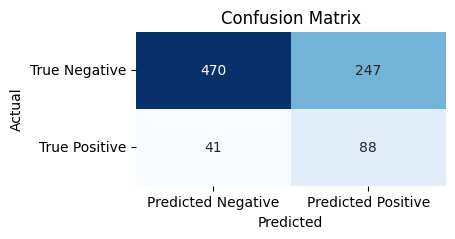

In [12]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
precision = precision_score(y_test, y_pred)
print(f"Our model is {precision*100:.3f} % precised.")

Our model is 26.269 % precised.


In [14]:
recall= recall_score(y_test, y_pred)
print(f"{recall*100:.3f} %")

68.217 %


In [15]:
f1_score(y_test, y_pred)

0.3793103448275862

#### Let's do parameter tuning to find out best result

In [28]:
hyperparameter = {
    "penalty": ['l2'],
    "solver": ['saga', 'sag'],  
    "class_weight": [None, 'balanced'],
    "max_iter": [1000, 1300],  
    "C": [0.01, 0.1, 1, 10, 100]
}

In [29]:
f1_scorer = make_scorer(f1_score)

In [30]:
grid_search  = GridSearchCV(estimator=logReg, param_grid=hyperparameter, cv=3, scoring=f1_scorer)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(C=0.1, class_weight='balanced',
                                          max_iter=1000, random_state=49,
                                          solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [1000, 1300], 'penalty': ['l2'],
                         'solver': ['saga', 'sag']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [32]:
logReg.set_params(**grid_search.best_params_)
logReg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=49, solver='saga')

In [33]:
logReg.score(X_test, y_test)

0.6607565011820331

In [34]:
y_predict = logReg.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, y_predict)

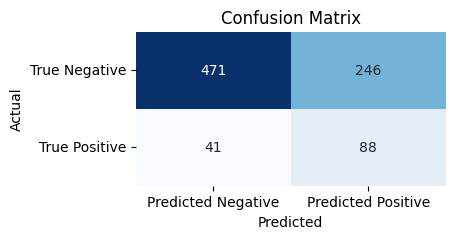

In [36]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<br>